# Segmentação de Clientes de Shopping com K-Means 🛍️

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

In [6]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


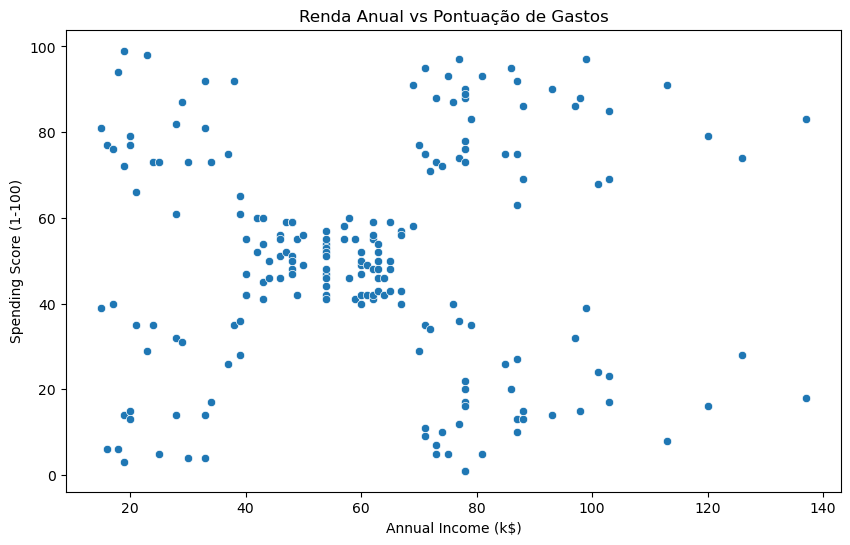

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y ='Spending Score (1-100)', data=x)
plt.title('Renda Anual vs Pontuação de Gastos')
plt.show()

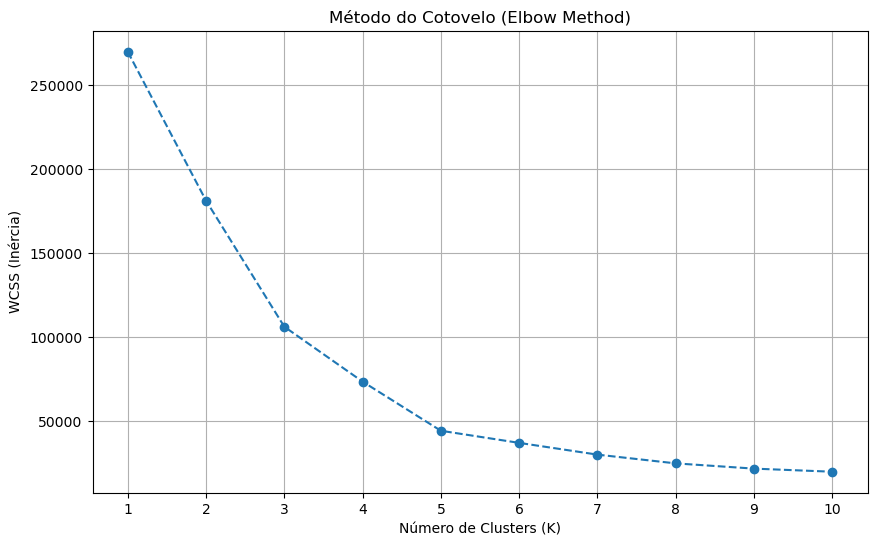

In [8]:
import warnings
import os
from sklearn.exceptions import DataConversionWarning

os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.cluster._kmeans')


wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show();

In [9]:
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=43, n_init=10)
y_kmeans = kmeans_final.fit_predict(x)

In [10]:
x['Cluster'] = y_kmeans
x.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


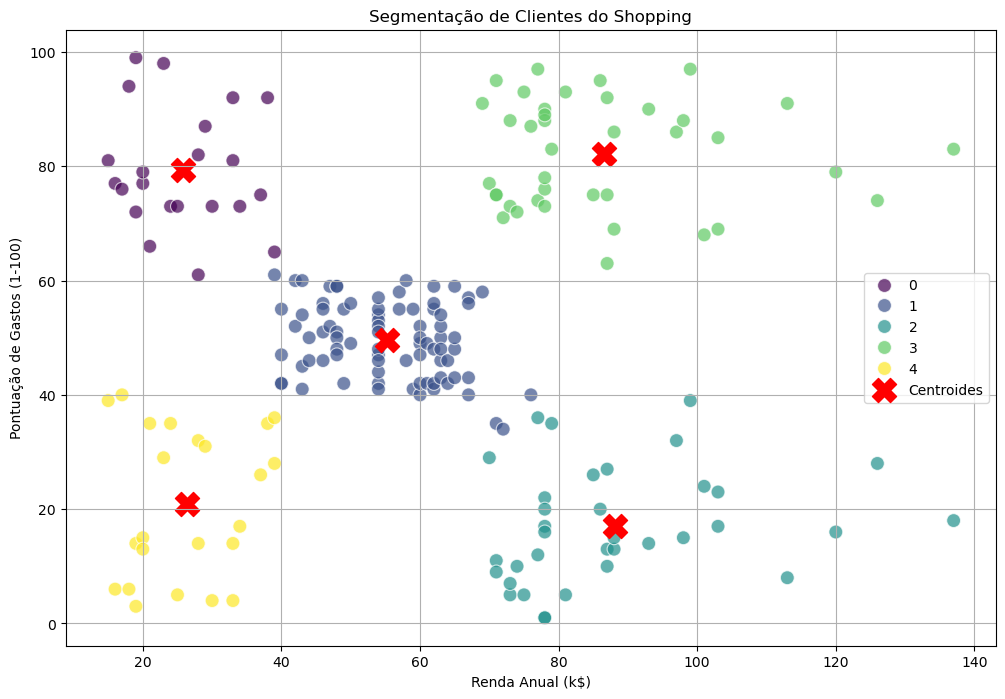

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=x, hue='Cluster', palette='viridis', s=100, alpha=0.7)

centroides = kmeans_final.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='X', label='Centroides')

plt.title('Segmentação de Clientes do Shopping')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend()
plt.grid(True)
plt.show();

# ✅ Conclusão Final do Projeto

Este projeto demonstrou com sucesso a aplicação de técnicas de **clusterização** para a **segmentação de clientes** de um shopping. Utilizando o algoritmo **K-Means**, foi possível identificar grupos distintos de clientes com base em seu comportamento de renda e gastos, transformando dados brutos em insights estratégicos para o negócio.

### Resumo do Processo

1.  **Análise Exploratória e Visual:** A análise inicial dos dados, focada nas variáveis `Annual Income (k$)` e `Spending Score (1-100)`, já sugeria visualmente a existência de aproximadamente 5 grupos de clientes.

2.  **Determinação do Número de Clusters (K):** Para confirmar a hipótese visual de forma quantitativa, foi aplicado o **Método do Cotovelo (Elbow Method)**. O gráfico resultante mostrou uma clara inflexão (o "cotovelo") em **K=5**, indicando que 5 é o número ideal de clusters para este dataset, pois oferece o melhor equilíbrio entre a compactação dos grupos (baixa inércia) e a simplicidade do modelo.

3.  **Modelagem com K-Means:** Um modelo K-Means foi treinado com `n_clusters=5`. O modelo atribuiu com sucesso cada cliente a um dos cinco segmentos.

### Interpretação dos Segmentos de Clientes

A visualização final dos clusters revelou 5 perfis de clientes claros e acionáveis, baseados no resultado do gráfico:

*   **Cluster 3 (Verde Claro) - Alvos Ideais:** Clientes com alta renda e alta pontuação de gastos. Este é o grupo mais valioso para o shopping.
*   **Cluster 2 (Verde Água) - Poupadores Ricos:** Clientes com alta renda, mas que gastam pouco. Um grupo com grande potencial a ser explorado.
*   **Cluster 1 (Azul) - Público Geral:** O maior grupo, com renda e gastos médios, representando o cliente mediano.
*   **Cluster 0 (Roxo) - Jovens Gastadores:** Clientes com baixa renda, mas que gastam muito, prováveis alvos para tendências e novidades.
*   **Cluster 4 (Amarelo) - Cautelosos:** Clientes com baixa renda e baixa pontuação de gastos, focados em compras essenciais.

**Conclusão Final:** O K-Means se provou uma ferramenta extremamente eficaz para encontrar padrões ocultos nos dados. A segmentação gerada permite que a equipe de marketing do shopping crie campanhas direcionadas e personalizadas para cada grupo, como programas de fidelidade para os "Alvos Ideais" ou ofertas de desconto para atrair os "Poupadores Ricos", otimizando assim o retorno sobre o investimento.